In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Scrape the data from the website:

!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1055k    0 1055k    0     0   745k      0 --:--:--  0:00:01 --:--:--  745k
100 1979k    0 1979k    0     0  1037k      0 --:--:--  0:00:01 --:--:-- 1037k


In [3]:
#turn the dataset into an easily callable variable (i.e. data)
#then take a look at the first 5 rows of the dataset

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
#Let's see what the data consits of and gain a general idea of the data distribution

data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


In [5]:
#Let's see if there are any null values:

data.isnull().values.any()

True

In [6]:
#Let's use mean with isnull to determine what percentage of the data in each column is Null:

data.isnull().mean() * 100

Fremont Bridge Total            0.015747
Fremont Bridge East Sidewalk    0.015747
Fremont Bridge West Sidewalk    0.015747
dtype: float64

In [7]:
#Remove all missing data

data = data.dropna()

In [8]:
#Reevaluate how dropping the null values changed the structure and distribution of our data

data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


In [15]:
#Double check to verify that all null values have been dropped from the dataset:

data.isnull().values.any()

False

In [23]:
#Rename the columns to make their names more easily identifiable:

data.columns = ['Total', 'East', 'West']

In [24]:
#Verify that naming convention has been applied:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63494 entries, 2012-10-03 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
Total    63494 non-null float64
East     63494 non-null float64
West     63494 non-null float64
dtypes: float64(3)
memory usage: 1.9 MB


In [25]:
data.describe()

,Total,East,West
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


In [26]:
#Restructure the columns to have the total moved to the right side of the dataset

data = data[['West','East','Total']]
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


Text(0, 0.5, 'Hourly Bike Count')

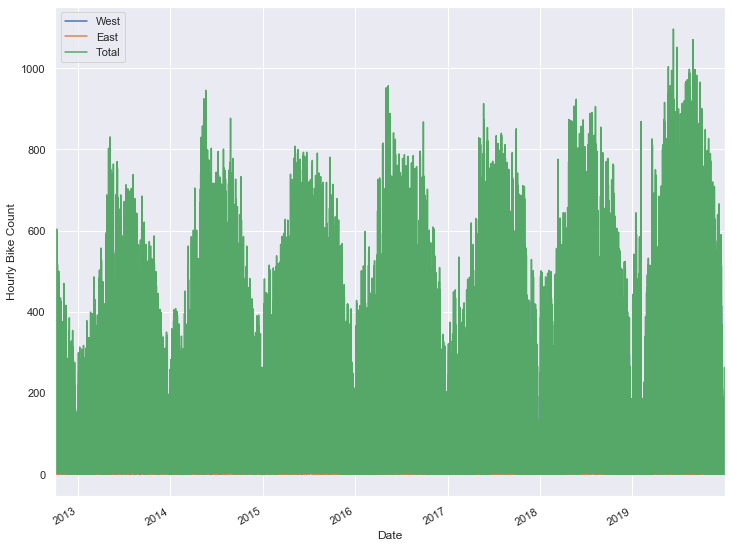

In [27]:
#Plot the entire dataset using the seaborn

sns.set()
data.plot(figsize=(12,10))
plt.ylabel('Hourly Bike Count')

Text(0, 0.5, 'Weekly Bicycle Count')

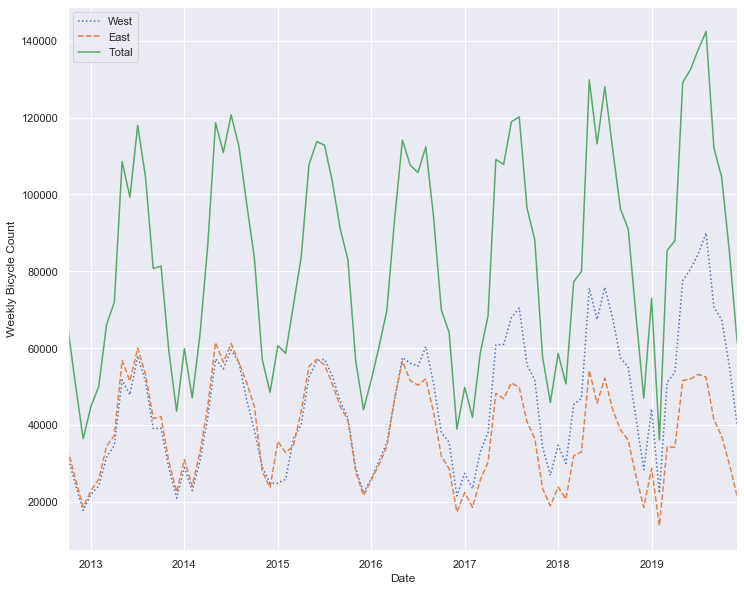

In [30]:
# Resample the data by week
weekly = data.resample('M').sum()
weekly.plot(style=[':','--','-'], figsize=(12,10))
plt.ylabel('Weekly Bicycle Count')

Text(0, 0.5, 'Mean Hourly Count')

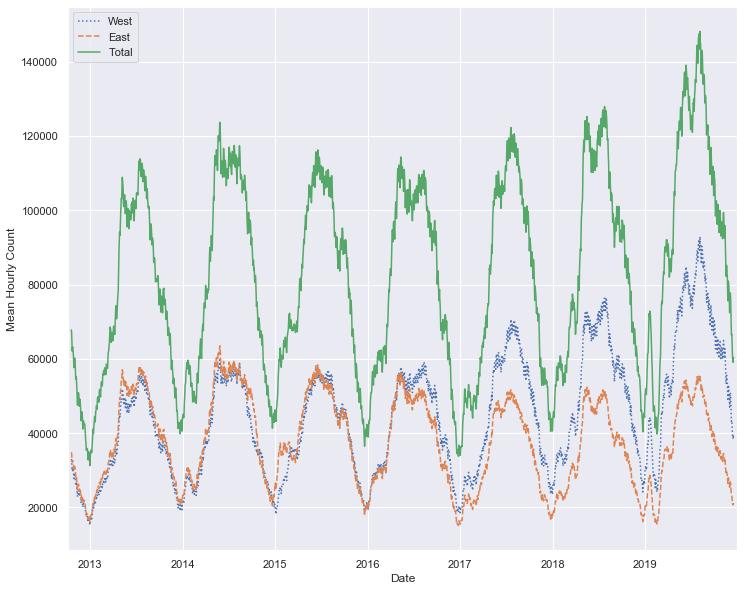

In [31]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], figsize=(12,10)) 
plt.ylabel('Mean Hourly Count')

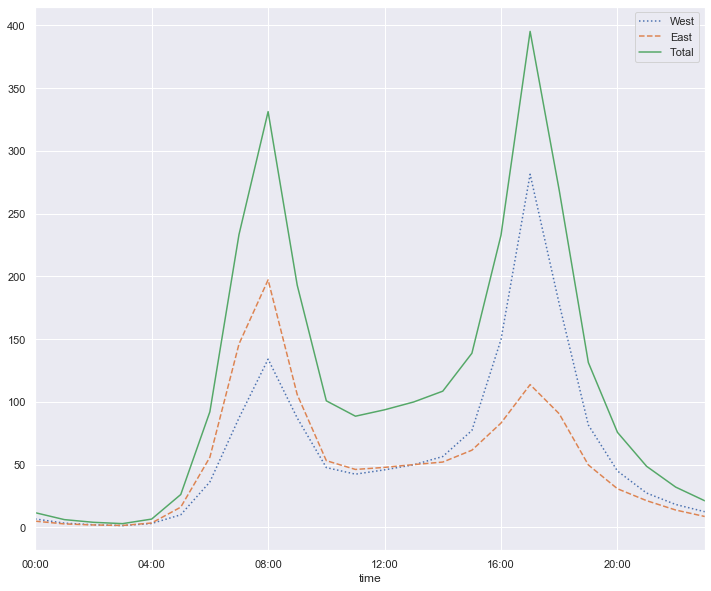

In [32]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 *60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'], figsize=(12,10))

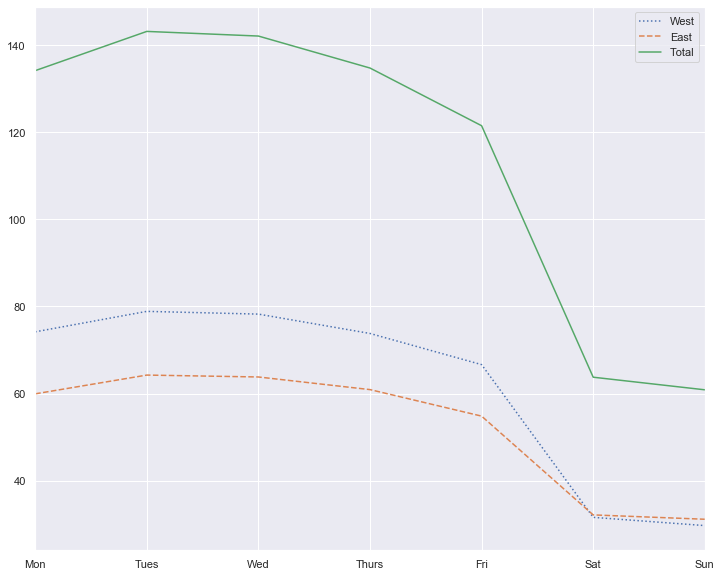

In [33]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], figsize=(12,10))

In [34]:
weekend = np.where(data.index.weekday<5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

C:\Users\v-julca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\v-julca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


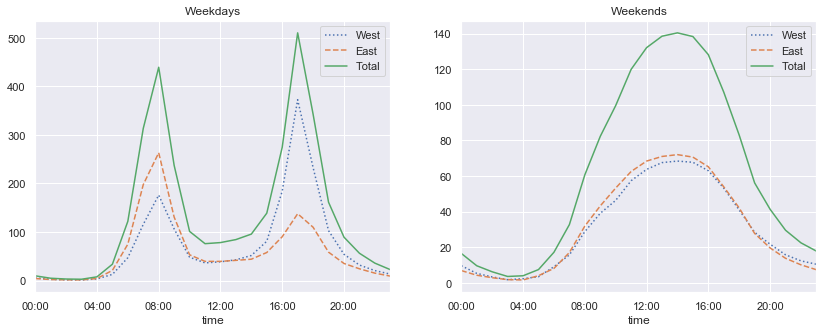

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', 
                          xticks = hourly_ticks, style=[':', '--', '-'])